# Enfermedad Dengue en la República Argentina - Aplicación de Machine Learning para su estudio y predicción de casos 
## Análisis Exploratorio de Datos (EDA) 

#### Elaborado por: Fresca, Lorenzo - Mojico, Ailín- Rosselló, Matías
#### Ingeniería Industrial UTN FRBA

In [1]:
#Carga de archivos en Colab
#from google.colab import files
#upload=files.upload()

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
warnings.filterwarnings('ignore')
import pylab as pl
sns.set()

from sklearn.preprocessing import StandardScaler

In [3]:
ls

 El volumen de la unidad C no tiene etiqueta.
 El n£mero de serie del volumen es: 46CA-A7CB

 Directorio de C:\Users\MatiRosse\Desktop\Ciencia de datos\Facultad\TP CUATRI\TP Modificaciones

18/11/20  19:16    <DIR>          .
18/11/20  19:16    <DIR>          ..
17/11/20  14:18    <DIR>          .ipynb_checkpoints
12/11/20  00:08            66,521 Casos_Dengue_Procesados.csv
16/11/20  17:18            23,755 Casos_Dengue_Procesados_5m.csv
15/11/20  15:22            30,647 Casos_Dengue_Procesados_6m.csv
11/11/20  14:37            17,387 Casos_Dengue_Procesados_actualizado.csv
18/11/20  19:14            66,521 Casos_Dengue_Procesados2.csv
18/11/20  19:16         1,160,569 Dengue - EDA.ipynb
18/11/20  19:16           139,614 Dengue - Modelos.ipynb
18/11/20  19:16           281,237 Dengue- PreProcessing.ipynb
01/11/20  19:15           356,033 Dengue_Zika.ipynb
10/11/20  19:45           830,814 EDA casos dengue - copia.ipynb
03/10/20  11:07            65,590 estaciones_meteorologicas_provin

In [4]:
#Leemos el dataframe ya pre-procesado
dengue=pd.read_csv("Casos_Dengue_Procesados.csv", encoding = "utf-8")
dengue.head(20)

,Provincia,Mes,Anio,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
0,BUENOS AIRES,1,2018,23.818903,78.826000,59.146452,14.287097,0
1,BUENOS AIRES,1,2019,22.901084,131.553399,69.955962,14.790099,0
2,BUENOS AIRES,1,2020,22.715584,79.471401,62.084416,15.177807,103
3,BUENOS AIRES,2,2018,23.143357,49.372000,62.202143,13.391429,9
4,BUENOS AIRES,2,2019,21.580357,60.700000,66.137143,12.844286,7
5,BUENOS AIRES,2,2020,21.921123,87.724632,66.459270,14.743680,426
6,BUENOS AIRES,3,2018,19.504000,69.082000,64.185161,13.586452,70
7,BUENOS AIRES,3,2019,18.507166,99.188702,74.474500,13.205939,30
8,BUENOS AIRES,3,2020,21.853557,155.041634,73.155468,13.345191,2377
9,BUENOS AIRES,4,2018,18.621348,141.735824,78.769179,12.490994,59


In [5]:
#Realizamos una agrupación para saber cuántos casos confirmados hay por año, ordenados de mayor a menor. 
dengue_anual=dengue.groupby(['Anio']).agg(sum)
dengue_anual=dengue_anual.reset_index()
#Ordenamos de mayor a menor para saber qué provincias tiene mayor cantidad de casos
dengue_anual = dengue_anual.sort_values('cantidad_casos', ascending=False)
dengue_anual

,Anio,Mes,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
2,2020,525,2702.563132,9284.082219,9942.162340,1840.667030,59300
1,2019,1950,5038.760599,19659.611039,19676.704705,3897.459658,1538
0,2018,1950,5037.865800,19177.968972,19582.816696,3854.337596,1295


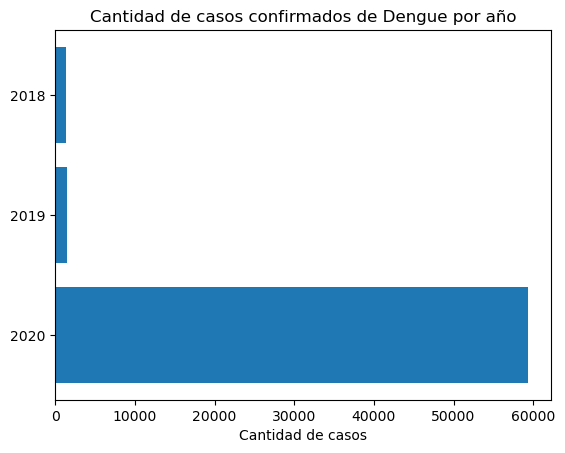

In [6]:
pl.rcdefaults()
fig, ax = pl.subplots()

ax.barh(dengue_anual["Anio"], dengue_anual["cantidad_casos"], align='center')
ax.set_yticks(dengue_anual["Anio"])
ax.set_yticklabels(dengue_anual["Anio"])
ax.invert_yaxis()
ax.set_xlabel('Cantidad de casos')
ax.set_title('Cantidad de casos confirmados de Dengue por año')
pl.show()


In [7]:
#Analizaremos el año con mayor casos, el año 2020.
dengue = dengue.loc[dengue['Anio'] ==2020]
dengue


,Provincia,Mes,Anio,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
2,BUENOS AIRES,1,2020,22.715584,79.471401,62.084416,15.177807,103
5,BUENOS AIRES,2,2020,21.921123,87.724632,66.459270,14.743680,426
8,BUENOS AIRES,3,2020,21.853557,155.041634,73.155468,13.345191,2377
11,BUENOS AIRES,4,2020,15.744112,107.766712,76.163376,13.279101,1319
14,BUENOS AIRES,5,2020,12.536700,17.883718,76.064069,14.178878,338
...,...,...,...,...,...,...,...,...
725,USHUAIA,2,2020,10.606087,48.700000,70.965217,25.347826,0
728,USHUAIA,3,2020,9.636290,40.600000,69.715447,21.000000,0
731,USHUAIA,4,2020,7.710000,17.400000,69.533333,20.141667,0
734,USHUAIA,5,2020,5.681301,25.000000,75.008130,17.276423,0


In [8]:
#Filtramos la cantidad de casos por provincia
dengue_prov_mes=dengue.loc[:,["Provincia","cantidad_casos"]]
dengue_prov_mes

,Provincia,cantidad_casos
2,BUENOS AIRES,103
5,BUENOS AIRES,426
8,BUENOS AIRES,2377
11,BUENOS AIRES,1319
14,BUENOS AIRES,338
...,...,...
725,USHUAIA,0
728,USHUAIA,0
731,USHUAIA,0
734,USHUAIA,0


In [9]:
#Realizamos una agrupación para saber cuántos casos confirmados hay por provincia, ordenados de mayor a menor. 
dengue_anual=dengue_prov_mes.groupby(['Provincia']).agg(sum)
dengue_anual=dengue_anual.reset_index()
#Ordenamos de mayor a menor para saber qué provincias tiene mayor cantidad de casos
dengue_anual = dengue_anual.sort_values('cantidad_casos', ascending=False)
dengue_anual

,Provincia,cantidad_casos
1,CABA,9172
23,TUCUMÁN,7756
16,SALTA,7571
13,MISIONES,5411
9,JUJUY,5235
20,SANTA FE,4680
0,BUENOS AIRES,4574
6,CÓRDOBA,3679
3,CHACO,3370
8,FORMOSA,3117


In [10]:
dengue_anual=dengue_anual.reset_index()
del dengue_anual['index']
dengue_anual

,Provincia,cantidad_casos
0,CABA,9172
1,TUCUMÁN,7756
2,SALTA,7571
3,MISIONES,5411
4,JUJUY,5235
5,SANTA FE,4680
6,BUENOS AIRES,4574
7,CÓRDOBA,3679
8,CHACO,3370
9,FORMOSA,3117


In [11]:
#Definimos un top a analizar para visualizar 
top_n=8
#Seleccionamos las provincias con más casos
dengue_anual_top=dengue_anual.loc[0:top_n,:]
dengue_anual_top

,Provincia,cantidad_casos
0,CABA,9172
1,TUCUMÁN,7756
2,SALTA,7571
3,MISIONES,5411
4,JUJUY,5235
5,SANTA FE,4680
6,BUENOS AIRES,4574
7,CÓRDOBA,3679
8,CHACO,3370


In [12]:
#Creamos una lista con las n provincias con más casos
top= dengue_anual_top['Provincia'][0:top_n].tolist()
top1=dengue_anual_top['Provincia'][0]
top

['CABA',
 'TUCUMÁN',
 'SALTA',
 'MISIONES',
 'JUJUY',
 'SANTA FE',
 'BUENOS AIRES',
 'CÓRDOBA']

In [13]:
#Filtramos las provincias con más casos en base a  la lista de mayor cantidad de casos 
dengue_top = dengue[dengue.Provincia.isin(top)]
dengue_top

,Provincia,Mes,Anio,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
2,BUENOS AIRES,1,2020,22.715584,79.471401,62.084416,15.177807,103
5,BUENOS AIRES,2,2020,21.921123,87.724632,66.459270,14.743680,426
8,BUENOS AIRES,3,2020,21.853557,155.041634,73.155468,13.345191,2377
11,BUENOS AIRES,4,2020,15.744112,107.766712,76.163376,13.279101,1319
14,BUENOS AIRES,5,2020,12.536700,17.883718,76.064069,14.178878,338
17,BUENOS AIRES,6,2020,9.753102,63.969393,80.034106,12.358555,11
32,CABA,1,2020,24.758468,66.150000,61.419355,12.153226,162
35,CABA,2,2020,24.108621,59.600000,64.150862,11.556034,911
38,CABA,3,2020,23.719758,162.300000,73.237903,11.568548,4681
41,CABA,4,2020,17.952500,87.900000,74.383333,10.450000,2816


In [14]:
#Creamos un parámetro para la cantidad de meses a visualizar desde el mes de Enero
cant_mes= 6
cant_mes= cant_mes + 1
x=range(cant_mes)
list(x)
cant_meses=list(range(cant_mes))
cant_meses

[0, 1, 2, 3, 4, 5, 6]

In [15]:
#Filtramos por el parámerto de la cantidad de meses a visualizar
dengue_top = dengue_top[dengue.Mes.isin(cant_meses)]
dengue_top

,Provincia,Mes,Anio,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
2,BUENOS AIRES,1,2020,22.715584,79.471401,62.084416,15.177807,103
5,BUENOS AIRES,2,2020,21.921123,87.724632,66.459270,14.743680,426
8,BUENOS AIRES,3,2020,21.853557,155.041634,73.155468,13.345191,2377
11,BUENOS AIRES,4,2020,15.744112,107.766712,76.163376,13.279101,1319
14,BUENOS AIRES,5,2020,12.536700,17.883718,76.064069,14.178878,338
17,BUENOS AIRES,6,2020,9.753102,63.969393,80.034106,12.358555,11
32,CABA,1,2020,24.758468,66.150000,61.419355,12.153226,162
35,CABA,2,2020,24.108621,59.600000,64.150862,11.556034,911
38,CABA,3,2020,23.719758,162.300000,73.237903,11.568548,4681
41,CABA,4,2020,17.952500,87.900000,74.383333,10.450000,2816


In [16]:
dengue=dengue.drop(['Anio'], axis=1)


In [17]:
#Queremos ver la relación lineal entre variales
dengue.corr(method="pearson")

,Mes,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
Mes,1.000000,-0.700837,-0.464744,0.322507,-0.178209,0.043850
Temperatura,-0.700837,1.000000,0.472183,-0.278081,-0.374547,0.158690
Precipitacion,-0.464744,0.472183,1.000000,0.398157,-0.124899,0.119148
Humedad,0.322507,-0.278081,0.398157,1.000000,-0.018600,0.205906
Vel_vientos,-0.178209,-0.374547,-0.124899,-0.018600,1.000000,-0.231722
cantidad_casos,0.043850,0.158690,0.119148,0.205906,-0.231722,1.000000


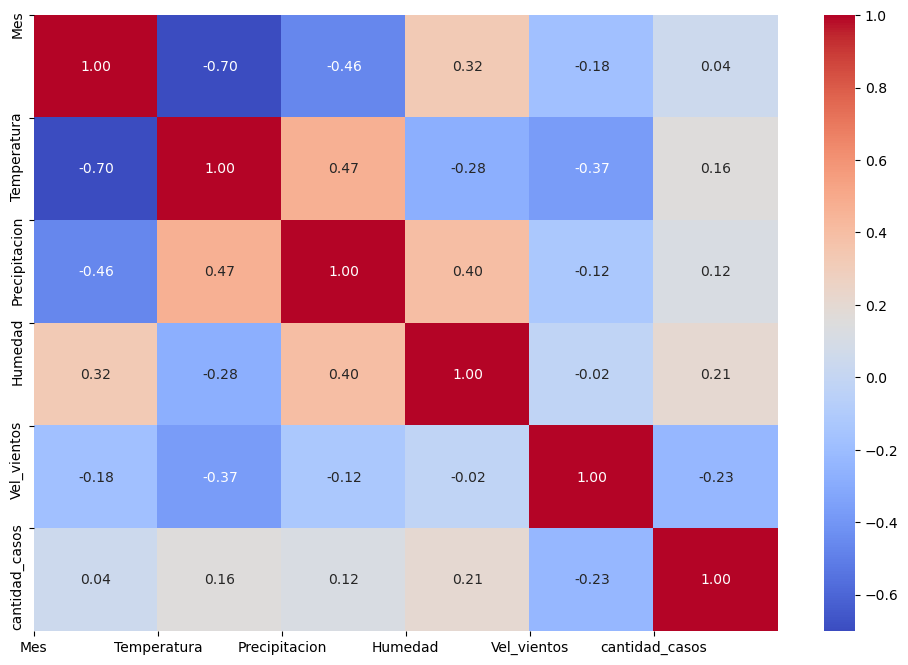

In [18]:
#Queremos visualizar la correlación lineal para evaluar si existe alguna relacion lineal entre las variables
corr = dengue.corr()
#Plot
fig, ax = plt.subplots(figsize=(12, 8))
#Permitimos anotaciones y numeros (float) sobre el mapa
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [19]:
dengue_pivot= pd.pivot_table(dengue_top,values = 'cantidad_casos', columns = 'Mes', index = dengue_top.Provincia.values, aggfunc = np.sum)
dengue_pivot

Mes,1,2,3,4,5,6
BUENOS AIRES,103,426,2377,1319,338,11
CABA,162,911,4681,2816,594,8
CÓRDOBA,23,257,1856,1205,333,5
JUJUY,19,101,1463,2182,1453,17
MISIONES,562,1383,2286,949,210,21
SALTA,339,1405,1681,1112,2951,83
SANTA FE,15,221,1662,2078,694,10
TUCUMÁN,0,2,765,186,6803,0


In [20]:
#Escalamos los datos de las provincias TOP
scaler = StandardScaler() 

In [21]:
#Copiamos el dataframe para escalar los datos
scaled_features = dengue_top.copy()


In [22]:
#Seleccionamos las columnas a las cuales queremos aplicar el Scaler
col_names = ['Temperatura', 'Humedad', 'Precipitacion',
       'Vel_vientos', 'cantidad_casos']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)

In [23]:
scaled_features[col_names] = features
scaled_features.head(20)

,Provincia,Mes,Anio,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
2,BUENOS AIRES,1,2020,0.650013,-0.122493,-1.594355,2.247002,-0.685584
5,BUENOS AIRES,2,2020,0.491523,-0.012924,-0.837421,2.061764,-0.439159
8,BUENOS AIRES,3,2020,0.478044,0.880763,0.321152,1.465042,1.049308
11,BUENOS AIRES,4,2020,-0.740750,0.253151,0.841578,1.436842,0.242133
14,BUENOS AIRES,5,2020,-1.380607,-0.940119,0.824396,1.820768,-0.506296
17,BUENOS AIRES,6,2020,-1.935917,-0.328294,1.511290,1.044054,-0.755773
32,CABA,1,2020,1.057555,-0.299345,-1.709424,0.956442,-0.640571
35,CABA,2,2020,0.927915,-0.386301,-1.236820,0.701626,-0.069140
38,CABA,3,2020,0.850339,0.977124,0.335415,0.706966,2.807088
41,CABA,4,2020,-0.300191,-0.010596,0.533596,0.229692,1.384232


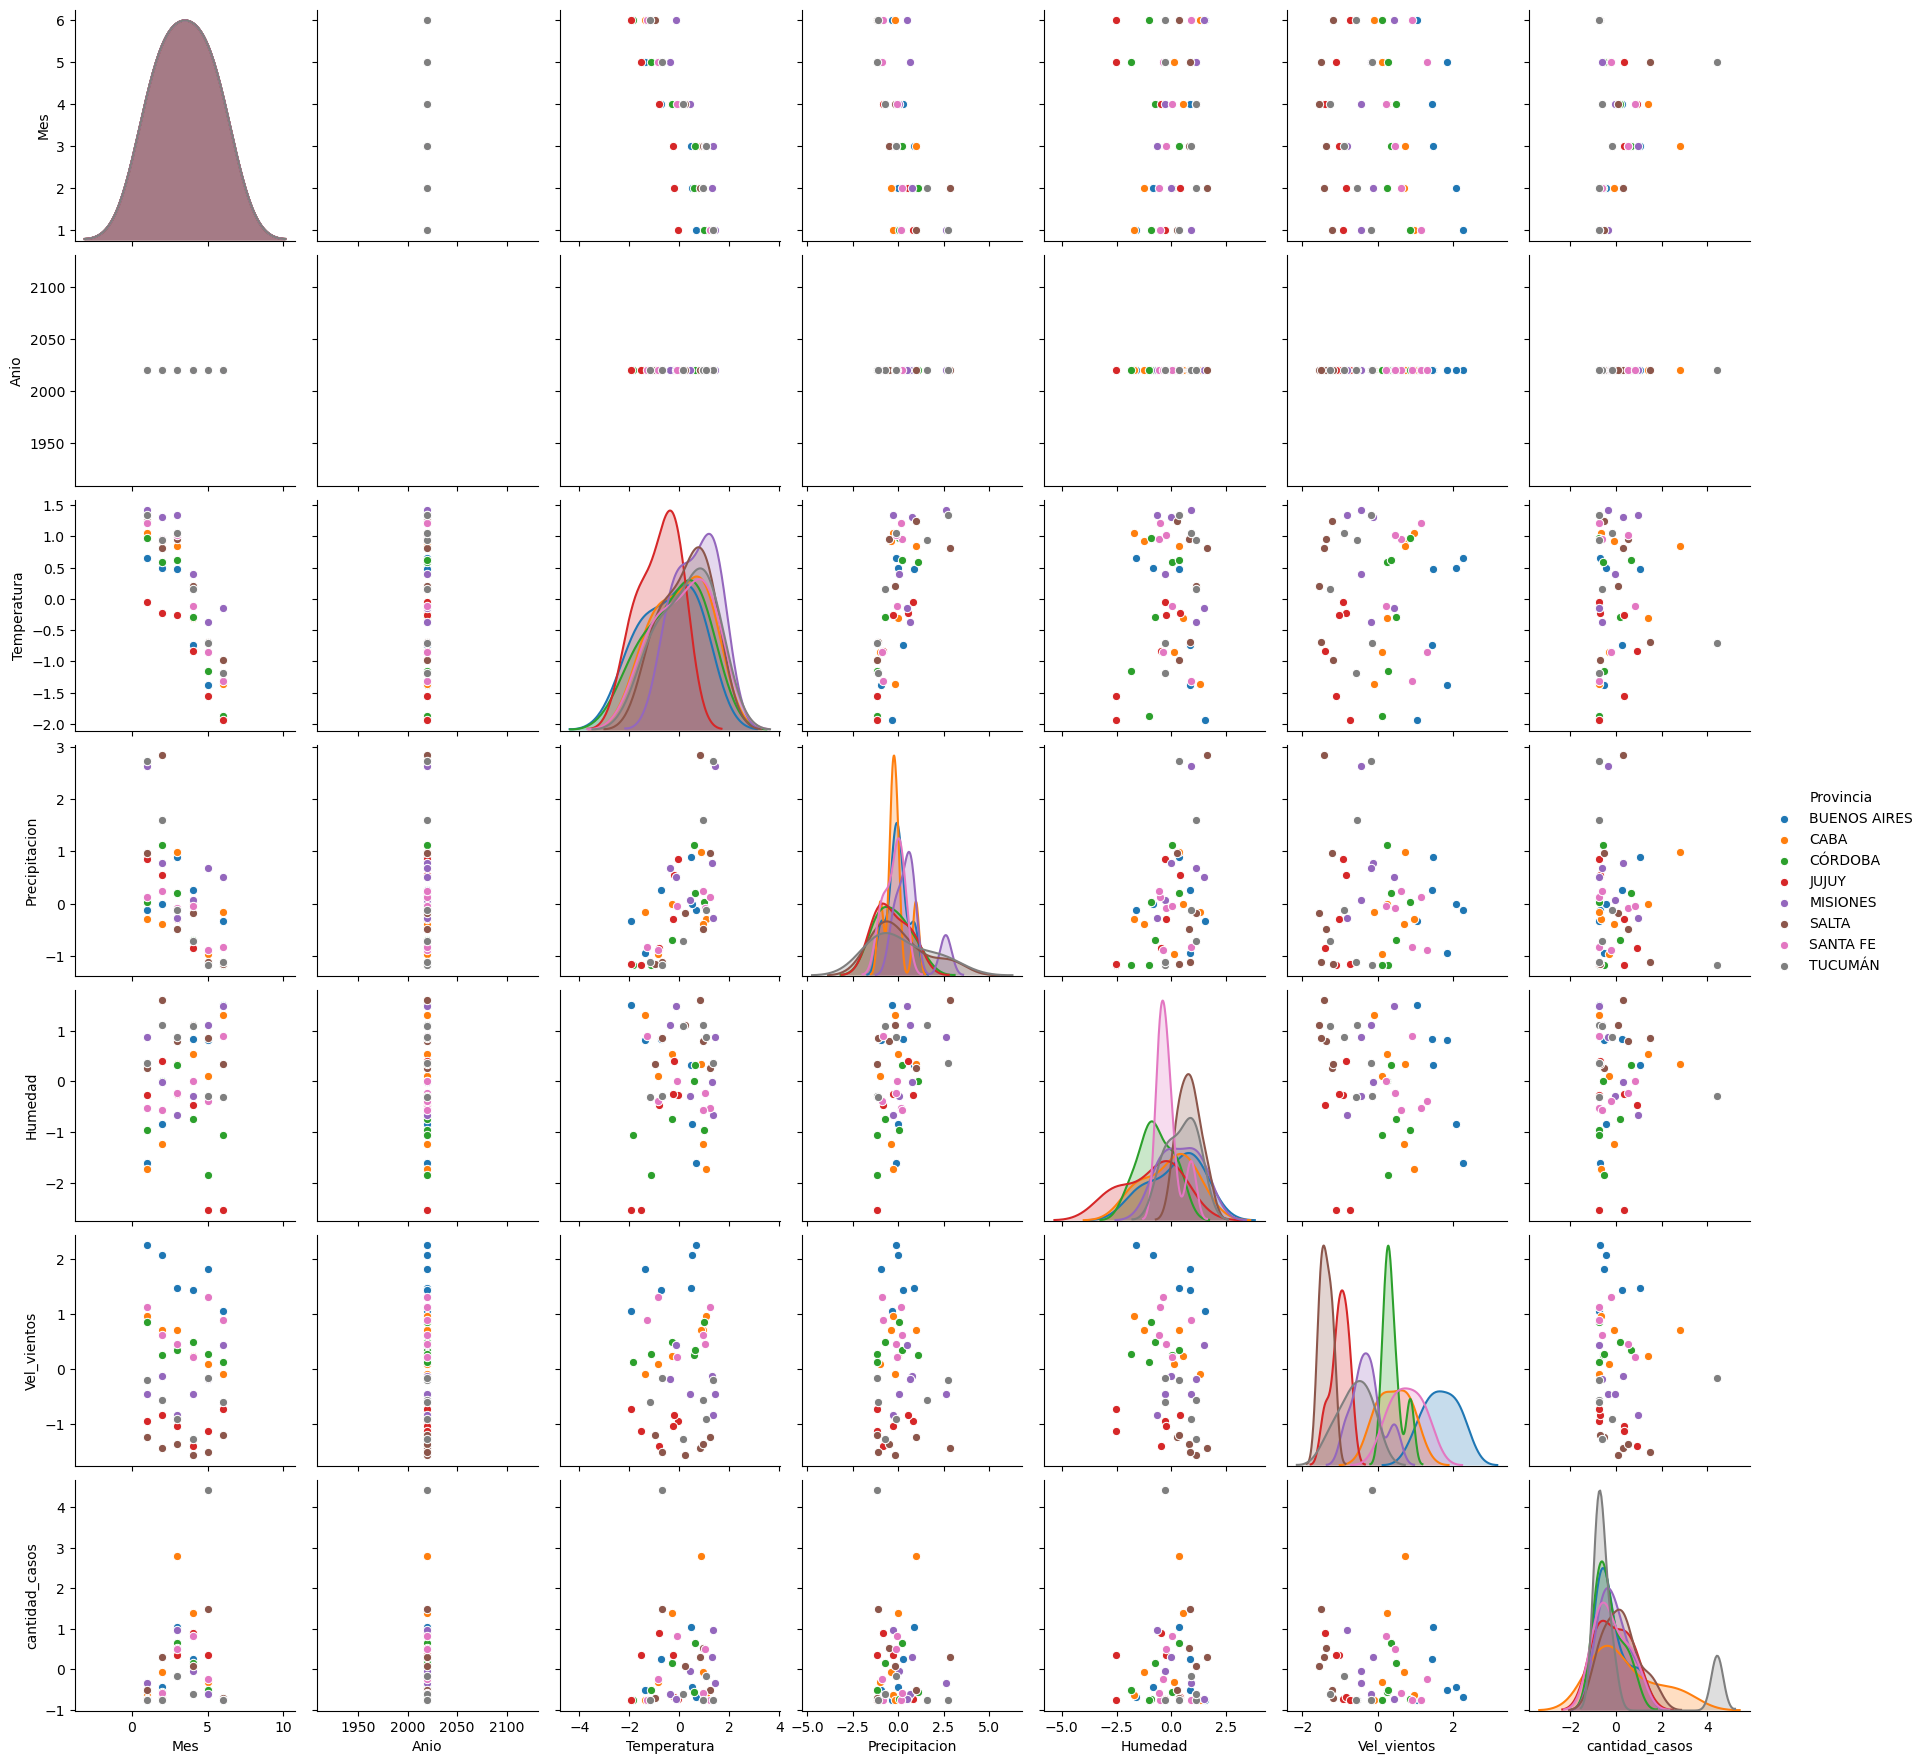

In [24]:
#Visualizamos las relación par-par entre variables
sns.pairplot(scaled_features, hue='Provincia')
plt.show()

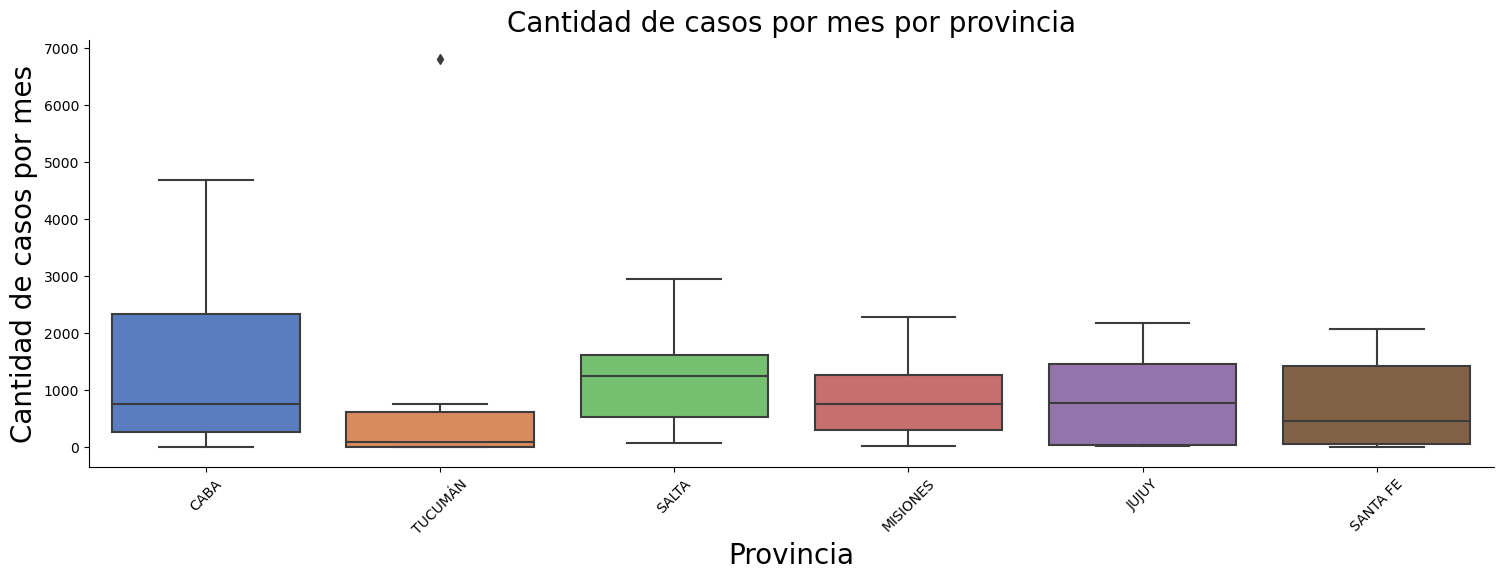

In [25]:
# Visualizamos la variación mensual por cada provincia en la cantidad de casos
g = sns.catplot(x="Provincia",y="cantidad_casos",
                data=dengue_top, 
                kind="box",
                order= top[0:6],
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=False) 
g.set_xticklabels(rotation=45)
plt.xlabel("Provincia",size = 20)
plt.ylabel("Cantidad de casos por mes",size = 20)
plt.title('Cantidad de casos por mes por provincia',size = 20)
plt.show()

In [26]:
dengue_t=dengue_pivot.transpose()
dengue_t

,BUENOS AIRES,CABA,CÓRDOBA,JUJUY,MISIONES,SALTA,SANTA FE,TUCUMÁN
Mes,,,,,,,,
1,103,162,23,19,562,339,15,0
2,426,911,257,101,1383,1405,221,2
3,2377,4681,1856,1463,2286,1681,1662,765
4,1319,2816,1205,2182,949,1112,2078,186
5,338,594,333,1453,210,2951,694,6803
6,11,8,5,17,21,83,10,0


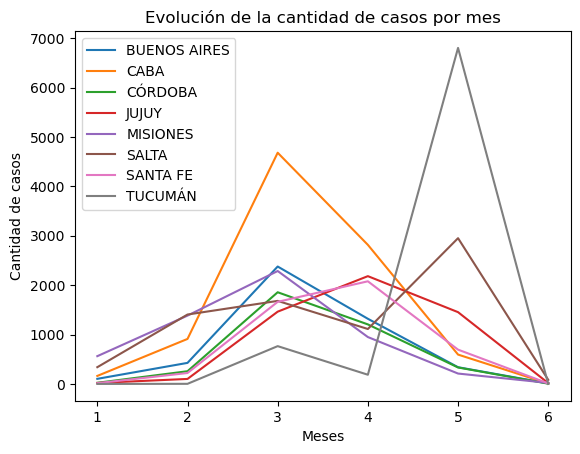

In [27]:
plt.plot(dengue_t)
plt.ylabel("Cantidad de casos")
plt.xlabel("Meses") 
plt.legend(labels=dengue_t.columns)
plt.title("Evolución de la cantidad de casos por mes")
plt.show()


(12.0, 28.0)

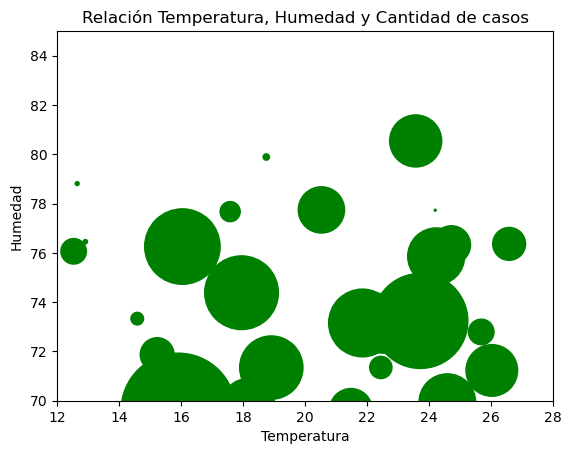

In [28]:
plt.scatter(x=dengue_top.Temperatura,y=dengue_top.Humedad, s=dengue_top.cantidad_casos, color="green") 
plt.title("Relación Temperatura, Humedad y Cantidad de casos") 
plt.ylabel("Humedad")
plt.xlabel("Temperatura")
plt.ylim([70,85]) 
plt.xlim([12,28]) 


[Text(0, 0.5, 'Casos confirmados de Dengue'), Text(0.5, 0, 'Meses')]

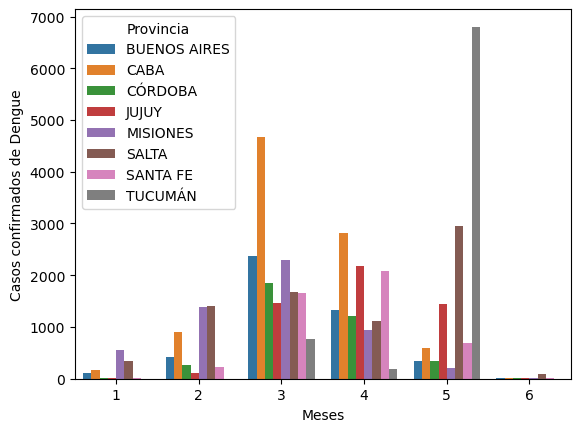

In [29]:
plt=sns.barplot(x=dengue_top.Mes, y=dengue_top.cantidad_casos, hue=dengue_top.Provincia)
plt.set(
   xlabel="Meses", 
    ylabel="Casos confirmados de Dengue",
)


In [30]:
#Analizamos cual es el mes que más casos tenemos 
dengue_mes=dengue.groupby(['Mes']).agg(sum)
dengue_mes=dengue_mes.reset_index()
dengue_mes=dengue_mes.loc[:,["Mes","cantidad_casos"]]
dengue_mes

,Mes,cantidad_casos
0,1,1407
1,2,5942
2,3,20743
3,4,14646
4,5,16091
5,6,471


Text(0.5, 1.0, 'Casos confirmados de Dengue por mes')

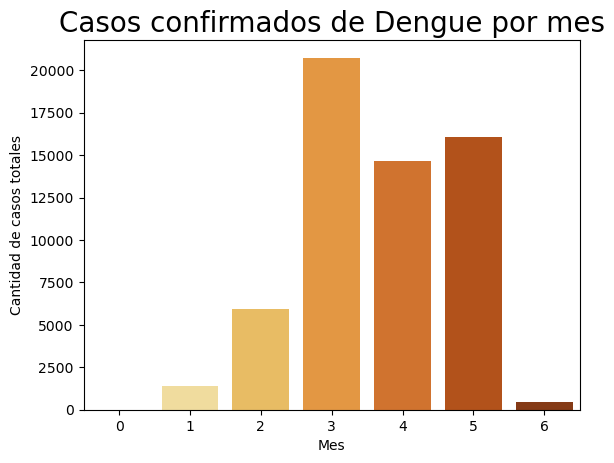

In [31]:
plt=sns.barplot(x=dengue_mes.Mes, y=dengue_mes.cantidad_casos, data=dengue_mes, order=cant_meses, palette="YlOrBr")
plt.set(xlabel="Mes", ylabel="Cantidad de casos totales")
plt.set_title('Casos confirmados de Dengue por mes',size = 20)

In [32]:
import matplotlib
matplotlib.axes.Axes.pie
matplotlib.pyplot.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, data=None)>

(-1.25, 1.25, -1.25, 1.25)

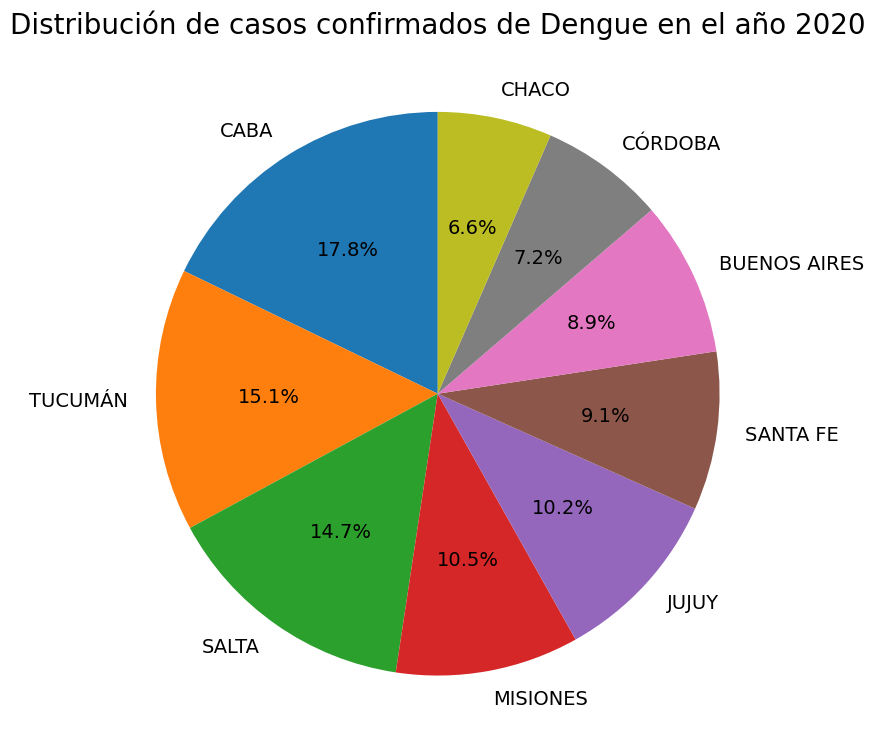

In [33]:
#Visualizamos como están distribuidos los casos en distintas provincias
pl.figure(figsize=(20,15))
ax1 = pl.subplot(122, aspect='equal')
dengue_anual_top.plot(kind='pie', y = 'cantidad_casos', ax=ax1, autopct='%1.1f%%', 
 startangle=90, shadow=False, labels=dengue_anual_top['Provincia'], legend = False, fontsize=14)
pl.title('Distribución de casos confirmados de Dengue en el año 2020',size = 20)
pl.axis('off')


In [34]:
Provincia_mas_casos=dengue.loc[dengue['Provincia']== top1]
Provincia_mas_casos

,Provincia,Mes,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
32,CABA,1,24.758468,66.15,61.419355,12.153226,162
35,CABA,2,24.108621,59.60,64.150862,11.556034,911
38,CABA,3,23.719758,162.30,73.237903,11.568548,4681
41,CABA,4,17.952500,87.90,74.383333,10.450000,2816
44,CABA,5,15.230242,15.25,71.870968,10.141129,594
47,CABA,6,12.650417,76.80,78.812500,9.691667,8


In [35]:
scaled_features_top1=scaled_features.loc[scaled_features['Provincia']==top1]
scaled_features_top1

,Provincia,Mes,Anio,Temperatura,Precipitacion,Humedad,Vel_vientos,cantidad_casos
32,CABA,1,2020,1.057555,-0.299345,-1.709424,0.956442,-0.640571
35,CABA,2,2020,0.927915,-0.386301,-1.236820,0.701626,-0.069140
38,CABA,3,2020,0.850339,0.977124,0.335415,0.706966,2.807088
41,CABA,4,2020,-0.300191,-0.010596,0.533596,0.229692,1.384232
44,CABA,5,2020,-0.843263,-0.975084,0.098908,0.097900,-0.310987
47,CABA,6,2020,-1.357922,-0.157958,1.299928,-0.093881,-0.758061


Text(0.5, 0, 'Mes')

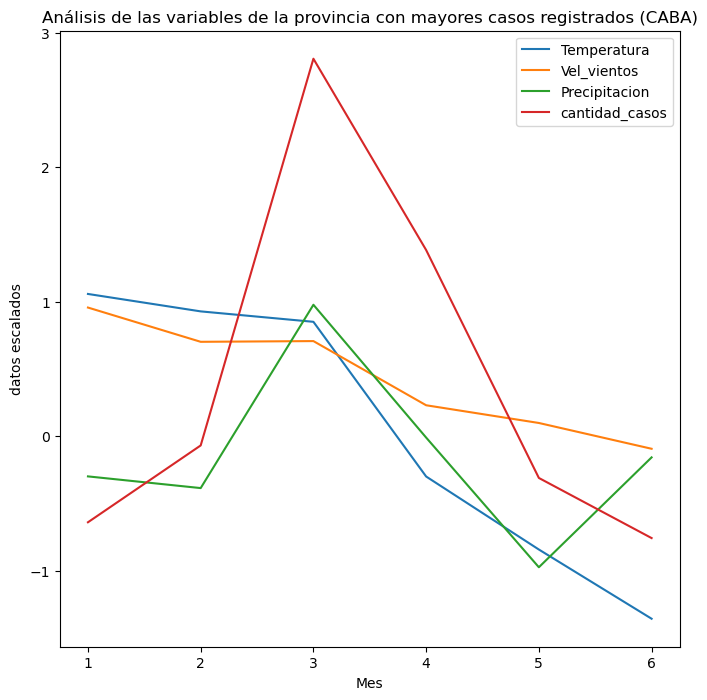

In [38]:
pl.figure(figsize=(8,8))
pl.plot(scaled_features_top1.Mes, scaled_features_top1['Temperatura'], label='Temperatura');plt.plot(scaled_features_top1.Mes, scaled_features_top1['Humedad'], label='Humedad');
pl.plot(scaled_features_top1.Mes, scaled_features_top1['Vel_vientos'], label='Vel_vientos');
pl.plot(scaled_features_top1.Mes, scaled_features_top1['Precipitacion'], label='Precipitacion');
pl.plot(scaled_features_top1.Mes, scaled_features_top1['cantidad_casos'], label='cantidad_casos');
pl.legend(loc='upper right')
pl.title(f"Análisis de las variables de la provincia con mayores casos registrados ({dengue_anual_top['Provincia'][0]})")
pl.ylabel('datos escalados')
pl.xlabel('Mes')